<a href="https://colab.research.google.com/github/Argivist/AI_Model_Notebooks/blob/Tutorial_based/Customer_Churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [46]:
%pip install keras-tuner
!pip install keras

## Setting up import dependencies

In [47]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

## Attempting to activate any available gpu for faster training

In [49]:
#getting all gpus
gpus=tf.config.experimental.list_physical_devices('GPU')
#limiting the gpu usage
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

# Load data


In [50]:
data=pd.read_csv('//content//drive//My Drive//Intro to AI//churn//CustomerChurn_dataset.csv')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Cleaning and preprocessing the data**

## Cleaning the data

Dropping any possible nas


In [52]:
data.replace(' ',np.nan,inplace=True)
data.dropna(inplace=True)

converting the strings that are supposed to be doubles to doubles


In [53]:
data['MonthlyCharges']=data['MonthlyCharges'].astype(float)
data['TotalCharges']=data['TotalCharges'].astype(float)

In [54]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Encoding and scaling categorical and numeric features repectively

### Separating categorical and quantitative features

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [56]:
data_o=data.select_dtypes(include=['object'])
data_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


In [57]:
data_i=data
data_i.drop(np.array(data_o.columns),axis=1,inplace=True)
data_i

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [58]:
churn=data_o[['Churn']]

In [59]:
data_o.drop(['Churn'],inplace=True,axis=1)

In [60]:
#customerID=data_o['customerID']
data_o.drop(['customerID'],axis=1,inplace=True)

### Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [62]:
#one hot encoding
data_o=pd.get_dummies(data_o)

In [63]:
#label encoding churn
churn=pd.get_dummies(churn)

In [64]:
churn=pd.DataFrame(churn)

In [65]:
churn=churn.drop(['Churn_No'],axis=1)
churn.rename(columns={'Churn_Yes':'Churn'},inplace=True)

In [66]:
churn

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [67]:
data['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [68]:
data_o=pd.concat([data_o,data['SeniorCitizen']],axis=1)

In [69]:
data_o=pd.concat([data_o,churn],axis=1)

In [70]:
data_i.drop(['SeniorCitizen'],inplace=True,axis=1)

In [71]:
data_o

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Churn
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1


### Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data_i)
data_i=pd.DataFrame(sc.transform(data_i),columns=data.columns)

### Joining the data

In [73]:
data_i.reset_index(drop=True, inplace=True)
data_o.reset_index(drop=True, inplace=True)
data=pd.concat([data_o,data_i],axis=1)

# **Feature importance and Splitting**

In [74]:
import seaborn as sns

In [75]:
data

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Churn,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,-1.280248,-1.161694,-0.994194
1,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,-1.239504,-0.363923,-0.959649
3,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0.512486,-0.747850,-0.195248
4,1,0,1,0,1,0,0,1,1,0,...,1,0,0,1,0,0,1,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,-0.343137,0.664868,-0.129180
7028,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1.612573,1.276493,2.241056
7029,1,0,0,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,-0.872808,-1.170004,-0.854514
7030,0,1,0,1,1,0,0,1,0,0,...,1,0,0,0,1,1,1,-1.158016,0.319168,-0.872095


In [76]:
from sklearn.ensemble import RandomForestClassifier
Y=data[['Churn']]
X=data.drop(['Churn'],axis=1)
model=RandomForestClassifier()
model.fit(X,Y)
importance=model.feature_importances_

<ipython-input-76-aa7d60b8d2ba>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


In [77]:
feature_imp={}
for i,j in enumerate(importance):
  feature_imp[X.columns[i]]=[j]
feature_imp=dict(sorted(feature_imp.items(),key=lambda item:item[1],reverse=True))
fi=pd.DataFrame(feature_imp).transpose()
fi

,0
TotalCharges,0.163767
tenure,0.143043
MonthlyCharges,0.139425
Contract_Month-to-month,0.051052
OnlineSecurity_No,0.031308
PaymentMethod_Electronic check,0.029150
TechSupport_No,0.028538
InternetService_Fiber optic,0.022672
OnlineBackup_No,0.020137
SeniorCitizen,0.019704


## EDA graph

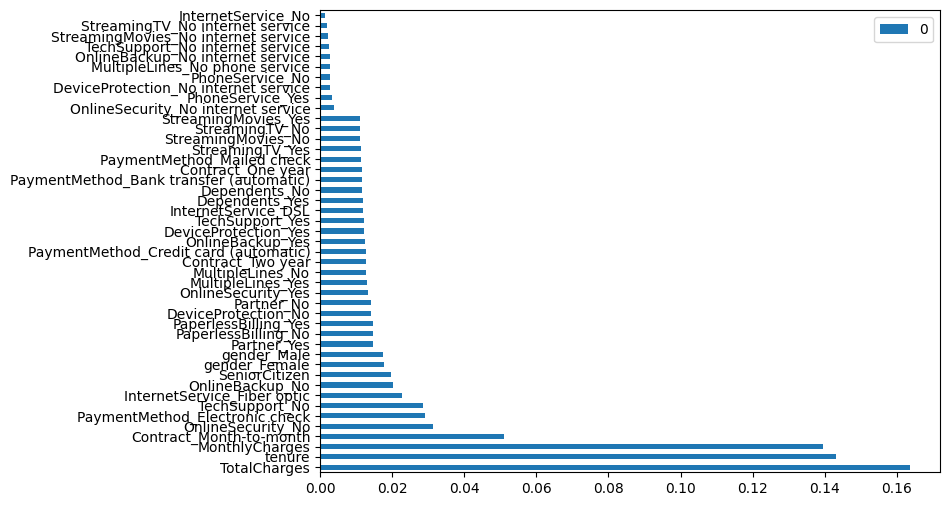

In [78]:
fi.plot(kind='barh',figsize=(8,6))
plt.show()

<Axes: >

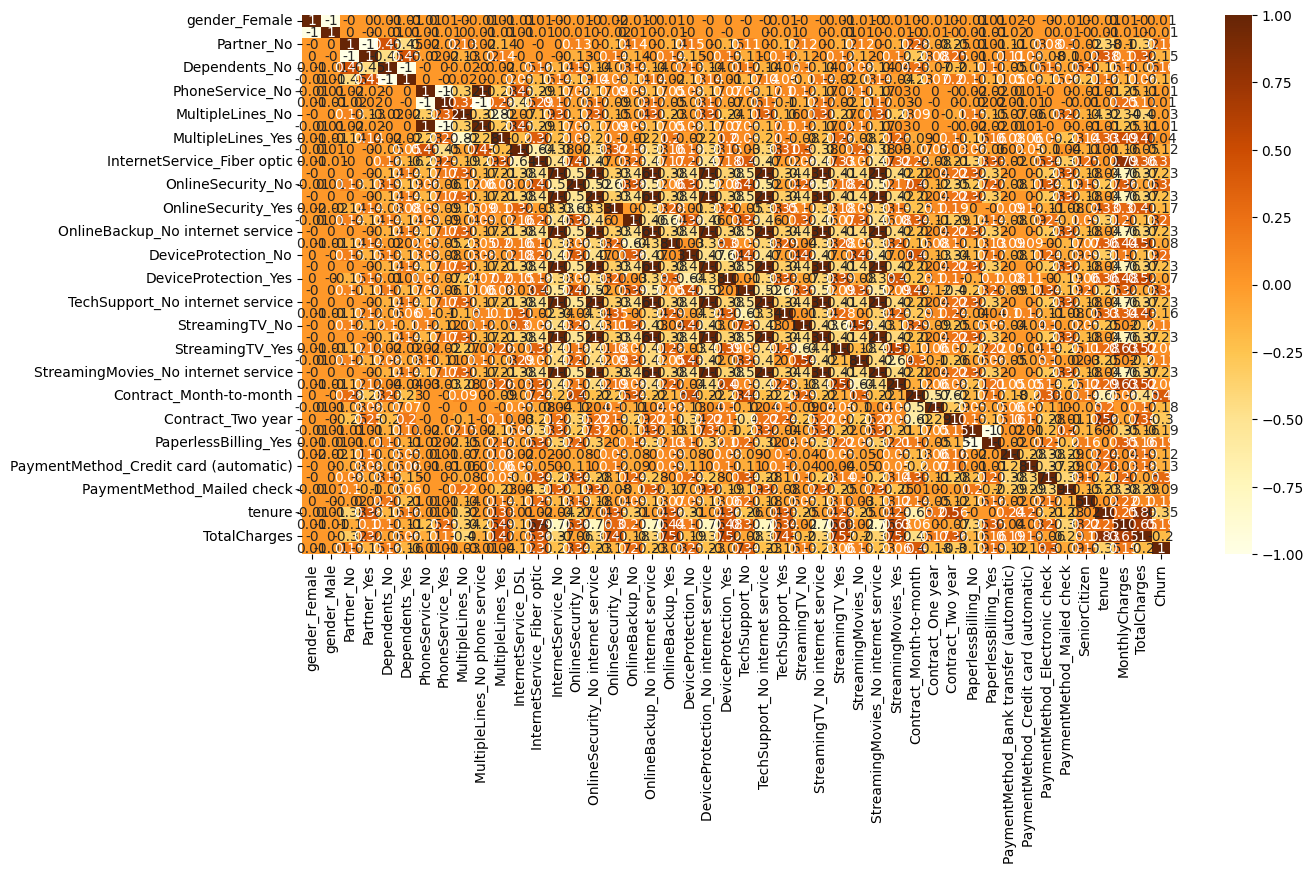

In [79]:
correlation = pd.concat([X,Y],axis=1).corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap='YlOrBr')

In [80]:
X_select_f=data[[col for col,imp in feature_imp.items() if imp[0]>0.015]]


<Axes: >

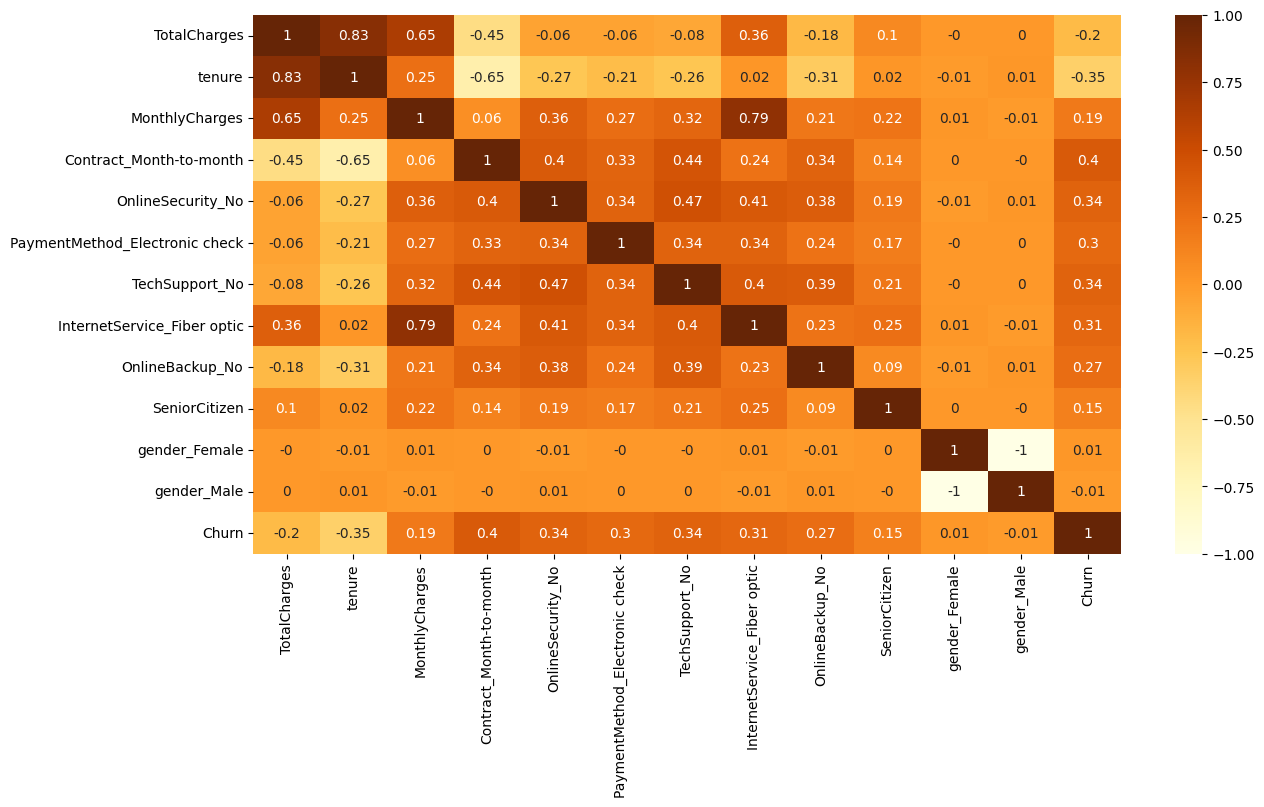

In [81]:
correlation = pd.concat([X_select_f,Y],axis=1).corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap='YlOrBr')

## Using Select K best
alternative to feature selection

In [82]:
Y_=data[['Churn']]
X=data.drop(['Churn'],axis=1)
from sklearn.feature_selection import SelectKBest,f_classif

st=SelectKBest(f_classif,k=7)

X_select_K=st.fit_transform(X,Y_)
X_select_K=pd.DataFrame(X_select_K,columns=X.columns[st.get_support()])

print("The selected features are ")
for i in X_select_K.columns:
  print(i)

The selected features are 
InternetService_Fiber optic
OnlineSecurity_No
TechSupport_No
Contract_Month-to-month
Contract_Two year
PaymentMethod_Electronic check
tenure


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

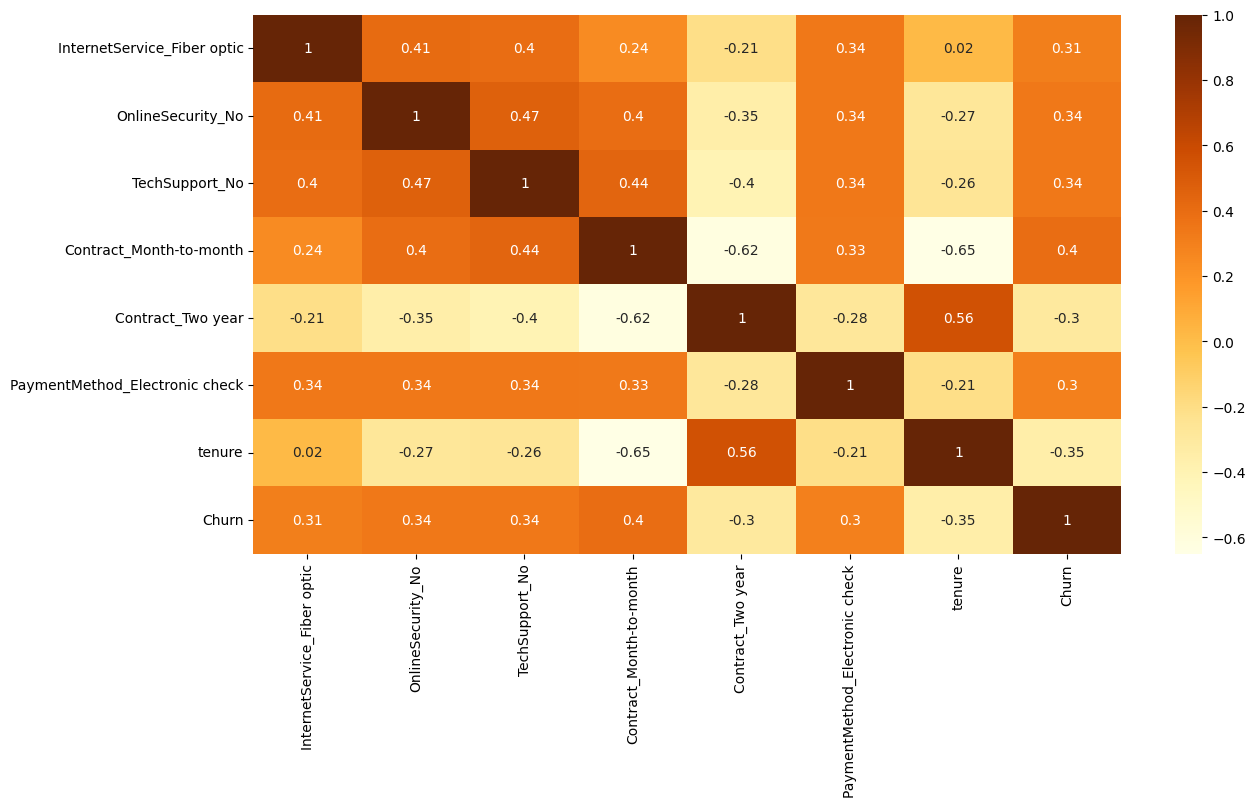

In [83]:
correlation = pd.concat([X_select_K,Y],axis=1).corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap='YlOrBr')

## RFEC

In [84]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [85]:
Y.shape

(7032, 1)

In [86]:
model=SVC(kernel='linear',probability=True)
cv=StratifiedKFold(n_splits=10)

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   uint8  
 1   gender_Male                              7032 non-null   uint8  
 2   Partner_No                               7032 non-null   uint8  
 3   Partner_Yes                              7032 non-null   uint8  
 4   Dependents_No                            7032 non-null   uint8  
 5   Dependents_Yes                           7032 non-null   uint8  
 6   PhoneService_No                          7032 non-null   uint8  
 7   PhoneService_Yes                         7032 non-null   uint8  
 8   MultipleLines_No                         7032 non-null   uint8  
 9   MultipleLines_No phone service           7032 non-null   uint8  
 10  MultipleLines_Yes                        7032 no

In [88]:
rfecv=RFECV(estimator=model,step=10,cv=cv,scoring='accuracy')
#rfecv=rfecv.fit(X,Y.values.ravel())

In [89]:
#print(rfecv.n_features_)

#support=rfecv.support_
#ranking=rfecv.ranking_

In [90]:
#X_select_r = X.columns[support]

In [91]:
#X_select_r

In [92]:
#correlation = pd.concat([X[X_select_r],Y],axis=1).corr().round(2)
#plt.figure(figsize = (14,7))
#sns.heatmap(correlation, annot = True, cmap='YlOrBr')

## Conclusion
Since the Kfold returns features with higher correlation, those features will be used

In [93]:
X_select=X_select_K

In [94]:
X_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   InternetService_Fiber optic     7032 non-null   float64
 1   OnlineSecurity_No               7032 non-null   float64
 2   TechSupport_No                  7032 non-null   float64
 3   Contract_Month-to-month         7032 non-null   float64
 4   Contract_Two year               7032 non-null   float64
 5   PaymentMethod_Electronic check  7032 non-null   float64
 6   tenure                          7032 non-null   float64
dtypes: float64(7)
memory usage: 384.7 KB


## Splitting the data into trainig and testing set

In [95]:
from sklearn.model_selection import train_test_split
# pulling global training data out as temp
Xtemp,Xtest,Ytemp,Ytest=train_test_split(X_select,Y,test_size=0.15,random_state=42)
# pulling local training,validation and training set out
Xtrain,X_tv,Ytrain,Y_tv=train_test_split(X_select,Y,test_size=0.2,random_state=42)
Xtest_,Xval,Ytest_,Yval=train_test_split(X_tv,Y_tv,test_size=0.5,random_state=42)

# Multi-layered perceptron model training

## Additional Dependencies

In [96]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
import kerastuner as kt
from tensorflow.keras.layers import Flatten,Dense,Activation,Dropout,Input
#from keras.optimizers import SGD

<ipython-input-96-8f5e007044fe>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


## Initial training


In [99]:
input_dim=X_select.columns.__len__()
inputs=Input(shape=(input_dim,))
x=Dense(10,activation='relu')(inputs)
for i in range(0,10):
  x=Dense(100,activation='relu',input_shape=(input_dim,))(x)
outputs=Dense(1,activation='sigmoid')(x)
model_init=keras.Model(inputs=inputs,outputs=outputs)
model_init.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-2),metrics=[tf.keras.metrics.BinaryAccuracy(name='acc')])


In [100]:
_hist_=model_init.fit(Xtemp,Ytemp)

187/187 [==============================] - 3s 4ms/step - loss: 0.5068 - acc: 0.7387


#### AUC score

In [101]:
Ypred=model_init.predict(Xtest)

33/33 [==============================] - 0s 2ms/step


In [107]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
from keras.callbacks import Callback

In [108]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ytest, Ypred)

In [109]:
auc_keras = auc(fpr_keras, tpr_keras)

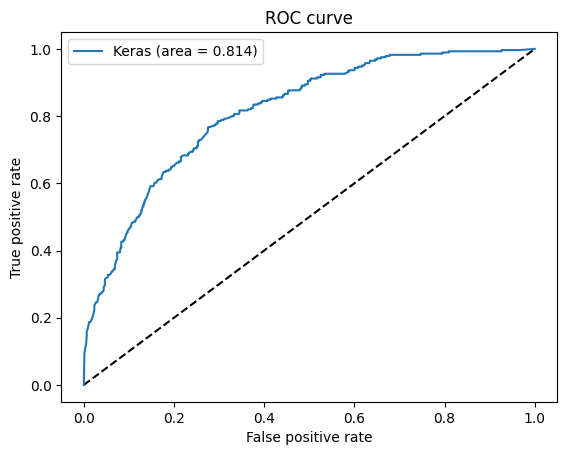

In [110]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Building and configuring the model


In [111]:
input_dim=X_select.columns.__len__()

def hptuneModel(hp):
  inputs=Input(shape=(input_dim,))
  x=Dense(hp.Int('units_0',min_value=10,max_value=100,step=10),
  activation=hp.Choice('activation',values=['relu','sigmoid','tanh'],default='relu'))(inputs)
  for i in range(hp.Int('num_layers', 2, 20)):
    x=Dense(hp.Int('units_'+str(i), min_value=10,max_value=100,step=10),activation=hp.Choice('activation',values=['relu','sigmoid','tanh']),input_shape=(input_dim,))(x)
  outputs=Dense(1,activation='sigmoid')(x)
  model=keras.Model(inputs=inputs,outputs=outputs)
  model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-5])),metrics=[tf.keras.metrics.BinaryAccuracy(name='acc')])
  return model

## Hyper parameter tuning

### setting up tuner

In [112]:
tuner= kt.Hyperband(hptuneModel,objective=kt.Objective("val_acc",direction="max"),max_epochs=100,hyperband_iterations=1,factor=10,directory='tuning_dir',project_name='Churning')

In [113]:
#tuner = GridSearch(hptuneModel,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='my_dir',project_name='log')

### hyper parameter tuning

In [114]:
Xval.shape

(704, 7)

In [115]:
tuner.search(Xtrain,Ytrain,epochs=100,validation_data=(Xval,Yval))

Trial 131 Complete [00h 01m 48s]
val_acc: 0.7769886255264282

Best val_acc So Far: 0.7855113744735718
Total elapsed time: 00h 30m 03s


### summary of best model

In [116]:
tuner.results_summary()

Results summary
Results in tuning_dir/Churning
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0126 summary
Hyperparameters:
units_0: 10
activation: tanh
num_layers: 16
units_1: 90
learning_rate: 0.001
units_2: 100
units_3: 40
units_4: 40
units_5: 20
units_6: 10
units_7: 30
units_8: 20
units_9: 20
units_10: 20
units_11: 20
units_12: 20
units_13: 10
units_14: 40
units_15: 50
units_16: 40
units_17: 40
units_18: 70
units_19: 60
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0116
Score: 0.7855113744735718

Trial 0025 summary
Hyperparameters:
units_0: 40
activation: relu
num_layers: 20
units_1: 20
learning_rate: 0.001
units_2: 100
units_3: 30
units_4: 80
units_5: 60
units_6: 70
units_7: 100
units_8: 90
units_9: 80
units_10: 20
units_11: 30
units_12: 30
units_13: 100
units_14: 50
units_15: 60
units_16: 10
units_17: 70
units_18: 100
tuner/epochs: 1
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
units_19: 10
Score: 0.7

### Getting the best Model

In [117]:
bestModel=tuner.get_best_models(num_models=1)[0]

### Evaluating the best model

#### AUC score

In [118]:
Ypred=bestModel.predict(Xtest_)

22/22 [==============================] - 0s 4ms/step


In [119]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
from keras.callbacks import Callback

In [120]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ytest_, Ypred)

In [121]:
auc_keras = auc(fpr_keras, tpr_keras)

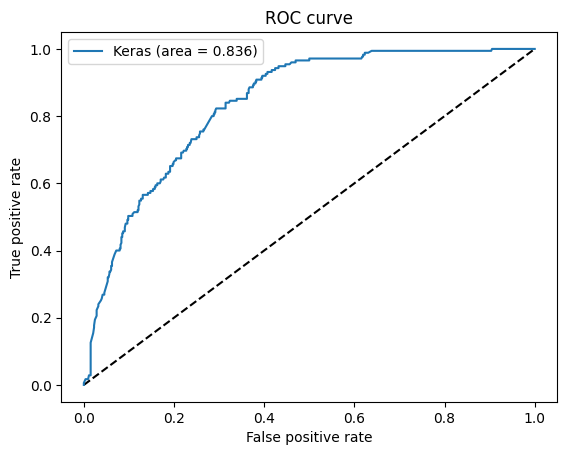

In [122]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Aditional Analysis

In [123]:
loss,accuracy=bestModel.evaluate(Xtest_,Ytest_)

22/22 [==============================] - 0s 3ms/step - loss: 0.4203 - acc: 0.7923


In [124]:
loss

0.42026469111442566

## Retraining the best model

In [126]:
FinalModel=hptuneModel(tuner.get_best_hyperparameters()[0])

In [127]:
FinalModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_18 (Dense)            (None, 10)                80        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 90)                990       
                                                                 
 dense_21 (Dense)            (None, 100)               9100      
                                                                 
 dense_22 (Dense)            (None, 40)                4040      
                                                                 
 dense_23 (Dense)            (None, 40)                1640

In [128]:
history=FinalModel.fit(Xtemp,Ytemp,validation_data=(Xtest,Ytest))

187/187 [==============================] - 6s 10ms/step - loss: 0.4656 - acc: 0.7656 - val_loss: 0.4575 - val_acc: 0.7829


# Evaluating The models performance

In [129]:
FinalModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_18 (Dense)            (None, 10)                80        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 90)                990       
                                                                 
 dense_21 (Dense)            (None, 100)               9100      
                                                                 
 dense_22 (Dense)            (None, 40)                4040      
                                                                 
 dense_23 (Dense)            (None, 40)                1640

#### AUC score

In [130]:
Ypred=FinalModel.predict(Xtest)

33/33 [==============================] - 0s 2ms/step


In [131]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
from keras.callbacks import Callback

In [132]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ytest, Ypred)

In [133]:
auc_keras = auc(fpr_keras, tpr_keras)

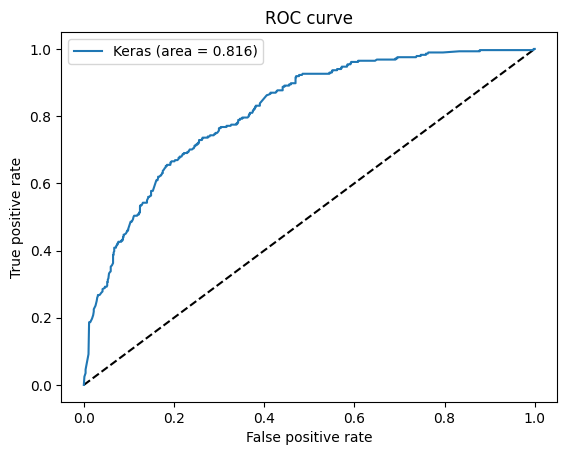

In [134]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Aditional analysis

In [135]:
loss,accuracy=bestModel.evaluate(Xtest_,Ytest_)

22/22 [==============================] - 0s 2ms/step - loss: 0.4203 - acc: 0.7923


In [136]:
loss

0.42026469111442566

### eval

In [140]:
loss,accuracy=bestModel.evaluate(Xtest,Ytest)

33/33 [==============================] - 0s 7ms/step - loss: 0.4566 - acc: 0.7810


### the hyperparameters

In [141]:
best_hp = tuner.get_best_hyperparameters()[0]
pd.DataFrame(best_hp.values, index=[0]).transpose()

,0
units_0,10
activation,tanh
num_layers,16
units_1,90
learning_rate,0.001
units_2,100
units_3,40
units_4,40
units_5,20
units_6,10


# Testing and evaluating the models accuracy

### Evaluating model post training

In [142]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [143]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [144]:
Ypred=FinalModel.predict(Xtest)
precision.update_state(Ytest,Ypred)
recall.update_state(Ytest,Ypred)
accuracy.update_state(Ytest,Ypred)

33/33 [==============================] - 0s 3ms/step


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1055.0>

In [145]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.6104417443275452, Recall:0.5352112650871277, Accuracy:0.7829383611679077


### sep

In [150]:
a=pd.DataFrame(Xtest.iloc(axis=0)[84]).transpose()

In [151]:
FinalModel.predict(pd.DataFrame(a))

1/1 [==============================] - 0s 33ms/step


array([[0.6232398]], dtype=float32)

In [152]:
Ytest.iloc(axis=0)[84]

Churn    0
Name: 5595, dtype: uint8

# Packing model

In [159]:
FinalModel.save(os.path.join('//content//drive//MyDrive//Intro to AI//model','churner','CustomerChurn_final.h5'))

In [158]:
bestModel.save(os.path.join('//content//drive//MyDrive//Intro to AI//model','churner','CustomerChurn_best.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Exporting any additional dependencies

In [161]:
dependence={
    'Scaler':sc,
    'input':X_select.columns,
    'Scaler_input':data_i.columns,
    'info':['Scaler','input','Scaler_input']
}

In [163]:
dependence

{'Scaler': StandardScaler(),
 'input': Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No',
        'Contract_Month-to-month', 'Contract_Two year',
        'PaymentMethod_Electronic check', 'tenure'],
       dtype='object'),
 'Scaler_input': Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 'info': ['Scaler', 'input', 'Scaler_input']}

In [164]:
import pickle

In [168]:
with open(os.path.join('/content/drive/MyDrive/Intro to AI/model','churner','dependencies.pkl'),'wb') as file_:
          pickle.dump(dependence,file_)
